## PatientInfo.csv

코로나 확진자 비율 추출하기 (서울 한국인만)

In [1]:
import csv
import pandas as pd
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

data_path = os.getenv('HOME') + '/aiffel/codingMaster/corona/data/'

In [2]:
patientInfo = pd.read_csv(data_path + "PatientInfo.csv")

patientInfo_korea = patientInfo[patientInfo['country']== 'Korea']
patientInfo_seoul = patientInfo_korea[patientInfo_korea['province'] == 'Seoul']

patientInfo_seoul.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

In [3]:
patientInfo_seoul = pd.DataFrame(patientInfo_seoul['city'].value_counts()).reset_index()
patientInfo_seoul.columns = ['city', 'confirmed']

patientInfo_seoul    # 확진자수 데이터

city  confirmed
0         Gwanak-gu        112
1           Guro-gu         85
2        Gangnam-gu         83
3               etc         80
4        Gangseo-gu         77
5      Yangcheon-gu         71
6         Dobong-gu         62
7   Yeongdeungpo-gu         62
8         Songpa-gu         55
9         Seocho-gu         55
10       Dongjak-gu         53
11     Eunpyeong-gu         53
12       Yongsan-gu         50
13     Seongdong-gu         49
14         Nowon-gu         43
15    Dongdaemun-gu         38
16          Mapo-gu         38
17     Seodaemun-gu         34
18      Gangdong-gu         34
19      Seongbuk-gu         33
20      Jungnang-gu         32
21     Geumcheon-gu         31
22       Gangbuk-gu         24
23        Jongno-gu         19
24      Gwangjin-gu         17
25          Jung-gu         12

In [4]:
patientInfo_seoul.drop(patientInfo_seoul.index[3], inplace=True)    # etc 제외하기

In [5]:
patientInfo_seoul['confirmed_ratio'] = round(patientInfo_seoul['confirmed'].div(patientInfo_seoul['confirmed'].sum())*100, 2)

patientInfo_seoul = patientInfo_seoul.sort_values('city')
patientInfo_seoul    # 확진자수 비율

city  confirmed  confirmed_ratio
6         Dobong-gu         62             5.07
15    Dongdaemun-gu         38             3.11
10       Dongjak-gu         53             4.34
11     Eunpyeong-gu         53             4.34
22       Gangbuk-gu         24             1.96
18      Gangdong-gu         34             2.78
2        Gangnam-gu         83             6.79
4        Gangseo-gu         77             6.30
21     Geumcheon-gu         31             2.54
1           Guro-gu         85             6.96
0         Gwanak-gu        112             9.17
24      Gwangjin-gu         17             1.39
23        Jongno-gu         19             1.55
25          Jung-gu         12             0.98
20      Jungnang-gu         32             2.62
16          Mapo-gu         38             3.11
14         Nowon-gu         43             3.52
9         Seocho-gu         55             4.50
17     Seodaemun-gu         34             2.78
19      Seongbuk-gu         33             2.70
13     Seongdong-gu         49             4.01
8         Songpa-gu         55             4.50
5      Yangcheon-gu         71             5.81
7   Yeongdeungpo-gu         62             5.07
12       Yongsan-gu         50             4.09

In [6]:
patientInfo_seoul['confirmed_ratio'].sum()

99.99000000000001

In [7]:
patientInfo_seoul.set_index('city', inplace=True)    # index 재설정하기

<AxesSubplot:title={'center':'Seoul corona ratio'}, xlabel='city', ylabel='confirmed ratio'>

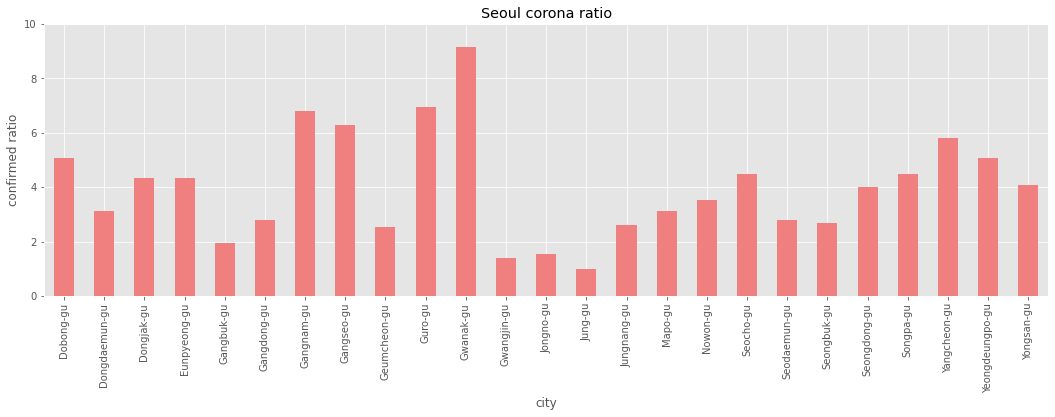

In [8]:
patientInfo_seoul['confirmed_ratio'].plot(kind='bar',figsize=(18,5), ylim=[0, 10], color='lightcoral', ylabel='confirmed ratio', title='Seoul corona ratio')

# 1-1. Region.csv : 확진자와 관련된 컬럼 찾기

## 데이터 파악하기

In [9]:
region = pd.read_csv(data_path + "Region.csv")

region

code          province          city   latitude   longitude  \
0    10000             Seoul         Seoul  37.566953  126.977977   
1    10010             Seoul    Gangnam-gu  37.518421  127.047222   
2    10020             Seoul   Gangdong-gu  37.530492  127.123837   
3    10030             Seoul    Gangbuk-gu  37.639938  127.025508   
4    10040             Seoul    Gangseo-gu  37.551166  126.849506   
..     ...               ...           ...        ...         ...   
239  61160  Gyeongsangnam-do     Haman-gun  35.272481  128.406540   
240  61170  Gyeongsangnam-do   Hamyang-gun  35.520541  127.725177   
241  61180  Gyeongsangnam-do  Hapcheon-gun  35.566702  128.165870   
242  70000           Jeju-do       Jeju-do  33.488936  126.500423   
243  80000             Korea         Korea  37.566953  126.977977   

     elementary_school_count  kindergarten_count  university_count  \
0                        607                 830                48   
1                         33                  38                 0   
2                         27                  32                 0   
3                         14                  21                 0   
4                         36                  56                 1   
..                       ...                 ...               ...   
239                       16                  20                 0   
240                       13                  12                 0   
241                       17                  15                 0   
242                      113                 123                 4   
243                     6087                8837               340   

     academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0             1.44                     15.38                  5.8   
1             4.18                     13.17                  4.3   
2             1.54                     14.55                  5.4   
3             0.67                     19.49                  8.5   
4             1.17                     14.39                  5.7   
..             ...                       ...                  ...   
239           1.19                     23.74                 14.7   
240           1.01                     32.65                 20.9   
241           0.71                     38.44                 24.7   
242           1.53                     15.10                  6.4   
243           1.56                     15.67                  7.2   

     nursing_home_count  
0                 22739  
1                  3088  
2                  1023  
3                   628  
4                  1080  
..                  ...  
239                  94  
240                  83  
241                  96  
242                1245  
243               94865  

[244 rows x 12 columns]

## 필요한 컬럼만 추출하기

In [10]:
'''
region = region[['province',
                 'city',
                 'elementary_school_count',
                 'kindergarten_count',
                 'university_count',
                 'academy_ratio',
                 'elderly_population_ratio',
                 'elderly_alone_ratio',
                 'nursing_home_count']]
'''

region.drop(['code', 'latitude', 'longitude'] ,axis=1, inplace=True)

region.head()

province         city  elementary_school_count  kindergarten_count  \
0    Seoul        Seoul                      607                 830   
1    Seoul   Gangnam-gu                       33                  38   
2    Seoul  Gangdong-gu                       27                  32   
3    Seoul   Gangbuk-gu                       14                  21   
4    Seoul   Gangseo-gu                       36                  56   

   university_count  academy_ratio  elderly_population_ratio  \
0                48           1.44                     15.38   
1                 0           4.18                     13.17   
2                 0           1.54                     14.55   
3                 0           0.67                     19.49   
4                 1           1.17                     14.39   

   elderly_alone_ratio  nursing_home_count  
0                  5.8               22739  
1                  4.3                3088  
2                  5.4                1023  
3                  8.5                 628  
4                  5.7                1080

## 서울만 추출하기

In [11]:
region['province'].value_counts()

Gyeonggi-do          32
Seoul                26
Gyeongsangbuk-do     24
Jeollanam-do         23
Gyeongsangnam-do     19
Gangwon-do           19
Busan                17
Chungcheongnam-do    16
Jeollabuk-do         15
Chungcheongbuk-do    12
Incheon              11
Daegu                 9
Ulsan                 6
Daejeon               6
Gwangju               6
Sejong                1
Korea                 1
Jeju-do               1
Name: province, dtype: int64

In [12]:
seoul_region = region[region['province'] == 'Seoul']

seoul_region['city'].value_counts()

Geumcheon-gu       1
Gangseo-gu         1
Gangnam-gu         1
Jongno-gu          1
Seocho-gu          1
Yangcheon-gu       1
Gangbuk-gu         1
Dongjak-gu         1
Yongsan-gu         1
Mapo-gu            1
Seongdong-gu       1
Gwanak-gu          1
Dobong-gu          1
Yeongdeungpo-gu    1
Seoul              1
Gangdong-gu        1
Eunpyeong-gu       1
Guro-gu            1
Jungnang-gu        1
Songpa-gu          1
Dongdaemun-gu      1
Seodaemun-gu       1
Jung-gu            1
Nowon-gu           1
Gwangjin-gu        1
Seongbuk-gu        1
Name: city, dtype: int64

In [13]:
seoul_region.isnull().sum()

province                    0
city                        0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [14]:
seoul_region

province             city  elementary_school_count  kindergarten_count  \
0     Seoul            Seoul                      607                 830   
1     Seoul       Gangnam-gu                       33                  38   
2     Seoul      Gangdong-gu                       27                  32   
3     Seoul       Gangbuk-gu                       14                  21   
4     Seoul       Gangseo-gu                       36                  56   
5     Seoul        Gwanak-gu                       22                  33   
6     Seoul      Gwangjin-gu                       22                  33   
7     Seoul          Guro-gu                       26                  34   
8     Seoul     Geumcheon-gu                       18                  19   
9     Seoul         Nowon-gu                       42                  66   
10    Seoul        Dobong-gu                       23                  26   
11    Seoul    Dongdaemun-gu                       21                  31   
12    Seoul       Dongjak-gu                       21                  34   
13    Seoul          Mapo-gu                       22                  24   
14    Seoul     Seodaemun-gu                       19                  25   
15    Seoul        Seocho-gu                       24                  27   
16    Seoul     Seongdong-gu                       21                  30   
17    Seoul      Seongbuk-gu                       29                  49   
18    Seoul        Songpa-gu                       40                  51   
19    Seoul     Yangcheon-gu                       30                  43   
20    Seoul  Yeongdeungpo-gu                       23                  39   
21    Seoul       Yongsan-gu                       15                  13   
22    Seoul     Eunpyeong-gu                       31                  44   
23    Seoul        Jongno-gu                       13                  17   
24    Seoul          Jung-gu                       12                  14   
25    Seoul      Jungnang-gu                       23                  31   

    university_count  academy_ratio  elderly_population_ratio  \
0                 48           1.44                     15.38   
1                  0           4.18                     13.17   
2                  0           1.54                     14.55   
3                  0           0.67                     19.49   
4                  1           1.17                     14.39   
5                  1           0.89                     15.12   
6                  3           1.16                     13.75   
7                  3           1.00                     16.21   
8                  0           0.96                     16.15   
9                  6           1.39                     15.40   
10                 1           0.95                     17.89   
11                 4           1.06                     17.26   
12                 3           1.17                     15.85   
13                 2           1.83                     14.05   
14                 6           1.12                     16.77   
15                 1           2.60                     13.39   
16                 2           0.97                     14.76   
17                 6           1.02                     16.15   
18                 1           1.65                     13.10   
19                 0           2.26                     13.55   
20                 0           1.21                     15.60   
21                 1           0.68                     16.87   
22                 1           1.09                     17.00   
23                 3           1.71                     18.27   
24                 2           0.94                     18.42   
25                 1           0.70                     16.65   

    elderly_alone_ratio  nursing_home_count  
0                   5.8               22739  
1                   4.3                3088  
2                   5.4      

## 데이터 정리하기

In [15]:
del seoul_region['province']

seoul_region

city  elementary_school_count  kindergarten_count  \
0             Seoul                      607                 830   
1        Gangnam-gu                       33                  38   
2       Gangdong-gu                       27                  32   
3        Gangbuk-gu                       14                  21   
4        Gangseo-gu                       36                  56   
5         Gwanak-gu                       22                  33   
6       Gwangjin-gu                       22                  33   
7           Guro-gu                       26                  34   
8      Geumcheon-gu                       18                  19   
9          Nowon-gu                       42                  66   
10        Dobong-gu                       23                  26   
11    Dongdaemun-gu                       21                  31   
12       Dongjak-gu                       21                  34   
13          Mapo-gu                       22                  24   
14     Seodaemun-gu                       19                  25   
15        Seocho-gu                       24                  27   
16     Seongdong-gu                       21                  30   
17      Seongbuk-gu                       29                  49   
18        Songpa-gu                       40                  51   
19     Yangcheon-gu                       30                  43   
20  Yeongdeungpo-gu                       23                  39   
21       Yongsan-gu                       15                  13   
22     Eunpyeong-gu                       31                  44   
23        Jongno-gu                       13                  17   
24          Jung-gu                       12                  14   
25      Jungnang-gu                       23                  31   

    university_count  academy_ratio  elderly_population_ratio  \
0                 48           1.44                     15.38   
1                  0           4.18                     13.17   
2                  0           1.54                     14.55   
3                  0           0.67                     19.49   
4                  1           1.17                     14.39   
5                  1           0.89                     15.12   
6                  3           1.16                     13.75   
7                  3           1.00                     16.21   
8                  0           0.96                     16.15   
9                  6           1.39                     15.40   
10                 1           0.95                     17.89   
11                 4           1.06                     17.26   
12                 3           1.17                     15.85   
13                 2           1.83                     14.05   
14                 6           1.12                     16.77   
15                 1           2.60                     13.39   
16                 2           0.97                     14.76   
17                 6           1.02                     16.15   
18                 1           1.65                     13.10   
19                 0           2.26                     13.55   
20                 0           1.21                     15.60   
21                 1           0.68                     16.87   
22                 1           1.09                     17.00   
23                 3           1.71                     18.27   
24                 2           0.94                     18.42   
25                 1           0.70                     16.65   

    elderly_alone_ratio  nursing_home_count  
0                   5.8               22739  
1                   4.3                3088  
2                   5.4                1023  
3                   8.5                 628  
4                   5.7                1080  
5                   4.9                 909  
6                   4.8                 723  
7                   5.7                 741  
8       

## 1) 요양원이 많은 자치구가 확진자도 많을까?

### 자치구별 요양원 데이터

In [16]:
seoul_nursing_home = seoul_region[['city', 'nursing_home_count']]

seoul_nursing_home    # 자치구별 요양원 개수

city  nursing_home_count
0             Seoul               22739
1        Gangnam-gu                3088
2       Gangdong-gu                1023
3        Gangbuk-gu                 628
4        Gangseo-gu                1080
5         Gwanak-gu                 909
6       Gwangjin-gu                 723
7           Guro-gu                 741
8      Geumcheon-gu                 475
9          Nowon-gu                 952
10        Dobong-gu                 485
11    Dongdaemun-gu                 832
12       Dongjak-gu                 762
13          Mapo-gu                 929
14     Seodaemun-gu                 587
15        Seocho-gu                1465
16     Seongdong-gu                 593
17      Seongbuk-gu                 729
18        Songpa-gu                1527
19     Yangcheon-gu                 816
20  Yeongdeungpo-gu                1001
21       Yongsan-gu                 435
22     Eunpyeong-gu                 874
23        Jongno-gu                 668
24          Jung-gu                 728
25      Jungnang-gu                 689

In [17]:
seoul_nursing_home = seoul_nursing_home[1:]
seoul_nursing_home

city  nursing_home_count
1        Gangnam-gu                3088
2       Gangdong-gu                1023
3        Gangbuk-gu                 628
4        Gangseo-gu                1080
5         Gwanak-gu                 909
6       Gwangjin-gu                 723
7           Guro-gu                 741
8      Geumcheon-gu                 475
9          Nowon-gu                 952
10        Dobong-gu                 485
11    Dongdaemun-gu                 832
12       Dongjak-gu                 762
13          Mapo-gu                 929
14     Seodaemun-gu                 587
15        Seocho-gu                1465
16     Seongdong-gu                 593
17      Seongbuk-gu                 729
18        Songpa-gu                1527
19     Yangcheon-gu                 816
20  Yeongdeungpo-gu                1001
21       Yongsan-gu                 435
22     Eunpyeong-gu                 874
23        Jongno-gu                 668
24          Jung-gu                 728
25      Jungnang-gu                 689

In [18]:
seoul_nursing_home['nursing_home_ratio'] = round(seoul_nursing_home['nursing_home_count'].div(seoul_nursing_home['nursing_home_count'].sum())*100, 2)

seoul_nursing_home.sort_values('city', inplace=True)    # 자치구별 요양원 비율
seoul_nursing_home

/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


city  nursing_home_count  nursing_home_ratio
10        Dobong-gu                 485                2.13
11    Dongdaemun-gu                 832                3.66
12       Dongjak-gu                 762                3.35
22     Eunpyeong-gu                 874                3.84
3        Gangbuk-gu                 628                2.76
2       Gangdong-gu                1023                4.50
1        Gangnam-gu                3088               13.58
4        Gangseo-gu                1080                4.75
8      Geumcheon-gu                 475                2.09
7           Guro-gu                 741                3.26
5         Gwanak-gu                 909                4.00
6       Gwangjin-gu                 723                3.18
23        Jongno-gu                 668                2.94
24          Jung-gu                 728                3.20
25      Jungnang-gu                 689                3.03
13          Mapo-gu                 929                4.09
9          Nowon-gu                 952                4.19
15        Seocho-gu                1465                6.44
14     Seodaemun-gu                 587                2.58
17      Seongbuk-gu                 729                3.21
16     Seongdong-gu                 593                2.61
18        Songpa-gu                1527                6.72
19     Yangcheon-gu                 816                3.59
20  Yeongdeungpo-gu                1001                4.40
21       Yongsan-gu                 435                1.91

In [19]:
seoul_nursing_home['nursing_home_ratio'].sum()

100.00999999999999

In [20]:
seoul_nursing_home.set_index('city', inplace=True)

seoul_nursing_home

nursing_home_count  nursing_home_ratio
city                                                   
Dobong-gu                       485                2.13
Dongdaemun-gu                   832                3.66
Dongjak-gu                      762                3.35
Eunpyeong-gu                    874                3.84
Gangbuk-gu                      628                2.76
Gangdong-gu                    1023                4.50
Gangnam-gu                     3088               13.58
Gangseo-gu                     1080                4.75
Geumcheon-gu                    475                2.09
Guro-gu                         741                3.26
Gwanak-gu                       909                4.00
Gwangjin-gu                     723                3.18
Jongno-gu                       668                2.94
Jung-gu                         728                3.20
Jungnang-gu                     689                3.03
Mapo-gu                         929                4.09
Nowon-gu                        952                4.19
Seocho-gu                      1465                6.44
Seodaemun-gu                    587                2.58
Seongbuk-gu                     729                3.21
Seongdong-gu                    593                2.61
Songpa-gu                      1527                6.72
Yangcheon-gu                    816                3.59
Yeongdeungpo-gu                1001                4.40
Yongsan-gu                      435                1.91

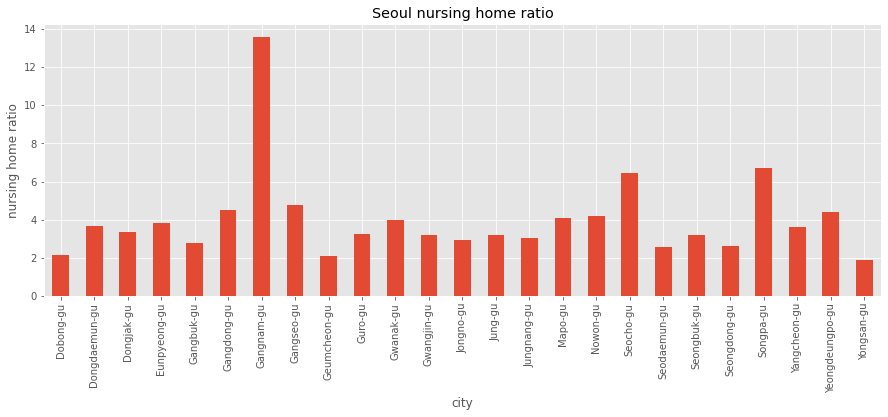

In [23]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.title("Seoul nursing home ratio")
plt.xlabel("city")
plt.ylabel("nursing home ratio")
seoul_nursing_home['nursing_home_ratio'].plot(kind='bar')
plt.show()

### 자치구별 확진자 데이터

In [24]:
patientInfo_seoul

confirmed  confirmed_ratio
city                                       
Dobong-gu               62             5.07
Dongdaemun-gu           38             3.11
Dongjak-gu              53             4.34
Eunpyeong-gu            53             4.34
Gangbuk-gu              24             1.96
Gangdong-gu             34             2.78
Gangnam-gu              83             6.79
Gangseo-gu              77             6.30
Geumcheon-gu            31             2.54
Guro-gu                 85             6.96
Gwanak-gu              112             9.17
Gwangjin-gu             17             1.39
Jongno-gu               19             1.55
Jung-gu                 12             0.98
Jungnang-gu             32             2.62
Mapo-gu                 38             3.11
Nowon-gu                43             3.52
Seocho-gu               55             4.50
Seodaemun-gu            34             2.78
Seongbuk-gu             33             2.70
Seongdong-gu            49             4.01
Songpa-gu               55             4.50
Yangcheon-gu            71             5.81
Yeongdeungpo-gu         62             5.07
Yongsan-gu              50             4.09

### 요양원과 확진자 비율 그래프로 비교하기

In [25]:
len(patientInfo_seoul.index)

25

In [26]:
len(seoul_nursing_home.index)

25

In [27]:
temp = pd.merge(seoul_nursing_home, patientInfo_seoul, left_index=True, right_index=True)
temp

nursing_home_count  nursing_home_ratio  confirmed  \
city                                                                 
Dobong-gu                       485                2.13         62   
Dongdaemun-gu                   832                3.66         38   
Dongjak-gu                      762                3.35         53   
Eunpyeong-gu                    874                3.84         53   
Gangbuk-gu                      628                2.76         24   
Gangdong-gu                    1023                4.50         34   
Gangnam-gu                     3088               13.58         83   
Gangseo-gu                     1080                4.75         77   
Geumcheon-gu                    475                2.09         31   
Guro-gu                         741                3.26         85   
Gwanak-gu                       909                4.00        112   
Gwangjin-gu                     723                3.18         17   
Jongno-gu                       668                2.94         19   
Jung-gu                         728                3.20         12   
Jungnang-gu                     689                3.03         32   
Mapo-gu                         929                4.09         38   
Nowon-gu                        952                4.19         43   
Seocho-gu                      1465                6.44         55   
Seodaemun-gu                    587                2.58         34   
Seongbuk-gu                     729                3.21         33   
Seongdong-gu                    593                2.61         49   
Songpa-gu                      1527                6.72         55   
Yangcheon-gu                    816                3.59         71   
Yeongdeungpo-gu                1001                4.40         62   
Yongsan-gu                      435                1.91         50   

                 confirmed_ratio  
city                              
Dobong-gu                   5.07  
Dongdaemun-gu               3.11  
Dongjak-gu                  4.34  
Eunpyeong-gu                4.34  
Gangbuk-gu                  1.96  
Gangdong-gu                 2.78  
Gangnam-gu                  6.79  
Gangseo-gu                  6.30  
Geumcheon-gu                2.54  
Guro-gu                     6.96  
Gwanak-gu                   9.17  
Gwangjin-gu                 1.39  
Jongno-gu                   1.55  
Jung-gu                     0.98  
Jungnang-gu                 2.62  
Mapo-gu                     3.11  
Nowon-gu                    3.52  
Seocho-gu                   4.50  
Seodaemun-gu                2.78  
Seongbuk-gu                 2.70  
Seongdong-gu                4.01  
Songpa-gu                   4.50  
Yangcheon-gu                5.81  
Yeongdeungpo-gu             5.07  
Yongsan-gu                  4.09

<Figure size 720x720 with 0 Axes>

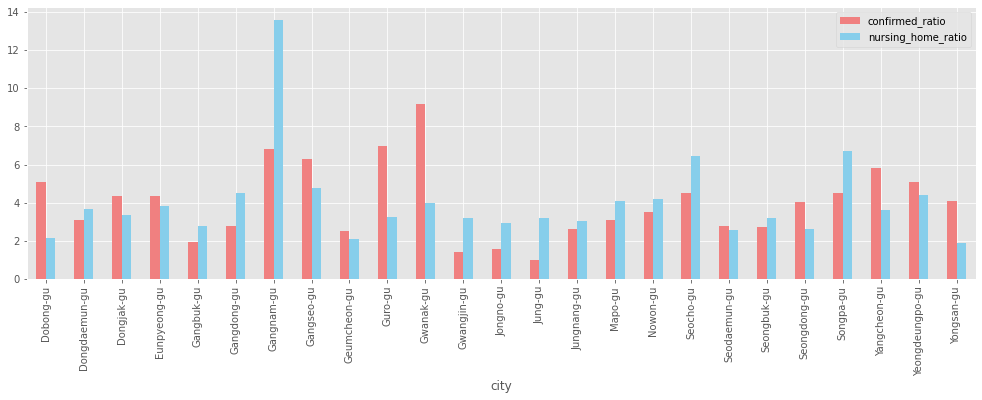

In [28]:
fig = plt.figure(figsize=(10,10))
temp.loc[:,['confirmed_ratio', 'nursing_home_ratio']].plot(kind='bar', figsize=(17,5), color = ["lightcoral", "skyblue"]) 
plt.show()

산점도 표시하고 회귀선 그리기

In [29]:
def mean(inp):
    result = 0
    len_inp = len(inp)    
    for i in inp:
        result += i
    result = result / len_inp
    return result

In [30]:
def make_b(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    son = 0
    mom = 0
    for i in range(len(x)):
        son += (x[i] - mean_x) * (y[i] - mean_y)
    for i in range(len(y)):
        mom += (x[i] - mean_x) ** 2
    b = son / mom
    return b

In [31]:
def make_a(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    b = make_b(x, y)
    a = mean_y  - (b * mean_x)
    return a

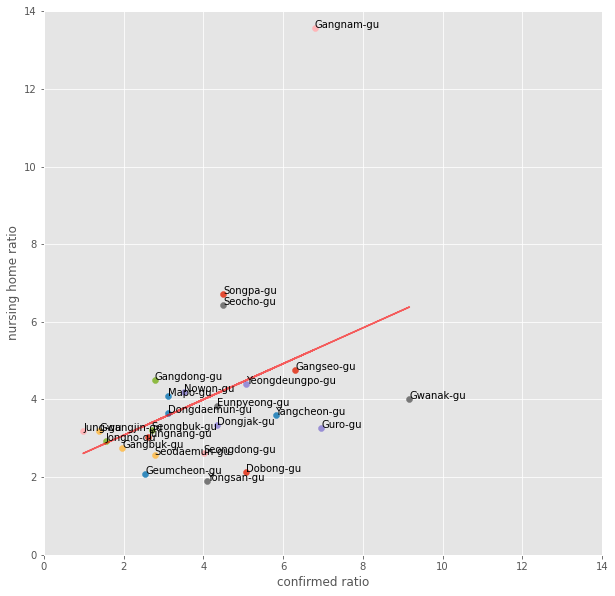

In [32]:
x_list = []
y_list = []

plt.figure(figsize=(10,10))
for city in list(temp.index):
    x = temp.loc[city]['confirmed_ratio']
    x_list.append(x)
    y = temp.loc[city]['nursing_home_ratio']
    y_list.append(y)
    plt.scatter(x, y)
    plt.text(x, y, city)

b = make_b(x_list, y_list)
a = make_a(x_list, y_list)
reg_y = []
for i in x_list:
    reg_y.append(a + (b * i))
    
# plt.plot(x_list, y_list, 'r')
plt.plot(x_list, reg_y, c = 'r', alpha = 0.6)
plt.xlim([0, 14])
plt.ylim([0, 14])
plt.xlabel('confirmed ratio')
plt.ylabel('nursing home ratio')
plt.title('')
plt.show()

- 요양원과 확진자는 관련이 있어보인다.

### 요양원과 확진자 상관분석

In [33]:
temp[['nursing_home_ratio', 'confirmed_ratio']]

nursing_home_ratio  confirmed_ratio
city                                                
Dobong-gu                      2.13             5.07
Dongdaemun-gu                  3.66             3.11
Dongjak-gu                     3.35             4.34
Eunpyeong-gu                   3.84             4.34
Gangbuk-gu                     2.76             1.96
Gangdong-gu                    4.50             2.78
Gangnam-gu                    13.58             6.79
Gangseo-gu                     4.75             6.30
Geumcheon-gu                   2.09             2.54
Guro-gu                        3.26             6.96
Gwanak-gu                      4.00             9.17
Gwangjin-gu                    3.18             1.39
Jongno-gu                      2.94             1.55
Jung-gu                        3.20             0.98
Jungnang-gu                    3.03             2.62
Mapo-gu                        4.09             3.11
Nowon-gu                       4.19             3.52
Seocho-gu                      6.44             4.50
Seodaemun-gu                   2.58             2.78
Seongbuk-gu                    3.21             2.70
Seongdong-gu                   2.61             4.01
Songpa-gu                      6.72             4.50
Yangcheon-gu                   3.59             5.81
Yeongdeungpo-gu                4.40             5.07
Yongsan-gu                     1.91             4.09

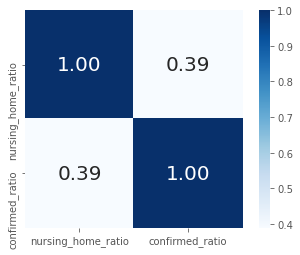

In [34]:
import seaborn as sns

corr = temp[['nursing_home_ratio', 'confirmed_ratio']].corr(method = 'pearson')
corr

heatmap = sns.heatmap(corr, 
                      cbar = True, 
                      annot = True, 
                      annot_kws={'size' : 20}, 
                      fmt = '.2f', 
                      square = True, 
                      cmap = 'Blues')

- -1.0과 -0.7 사이이면, 강한 음적 선형관계
- -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
- -0.3과 -0.1 사이이면, 약한 음적 선형관계
- -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
- +0.1과 +0.3 사이이면, 약한 양적 선형관계
- +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
- +0.7과 +1.0 사이이면, 강한 양적 선형관계

**요양원비율과 확진자비율은 뚜렷한 양적 선형관계이다.**

## 2) 노인이 많은 자치구가 확진자도 많을까?

### 자치구별 노인 비율 데이터

In [44]:
elderly_population_ratio = seoul_region[['city', 'elderly_population_ratio']]

elderly_population_ratio    # 자치구별 노인 비율 데이터

city  elderly_population_ratio
0             Seoul                     15.38
1        Gangnam-gu                     13.17
2       Gangdong-gu                     14.55
3        Gangbuk-gu                     19.49
4        Gangseo-gu                     14.39
5         Gwanak-gu                     15.12
6       Gwangjin-gu                     13.75
7           Guro-gu                     16.21
8      Geumcheon-gu                     16.15
9          Nowon-gu                     15.40
10        Dobong-gu                     17.89
11    Dongdaemun-gu                     17.26
12       Dongjak-gu                     15.85
13          Mapo-gu                     14.05
14     Seodaemun-gu                     16.77
15        Seocho-gu                     13.39
16     Seongdong-gu                     14.76
17      Seongbuk-gu                     16.15
18        Songpa-gu                     13.10
19     Yangcheon-gu                     13.55
20  Yeongdeungpo-gu                     15.60
21       Yongsan-gu                     16.87
22     Eunpyeong-gu                     17.00
23        Jongno-gu                     18.27
24          Jung-gu                     18.42
25      Jungnang-gu                     16.65

In [45]:
elderly_population_ratio = elderly_population_ratio[1:]
elderly_population_ratio

city  elderly_population_ratio
1        Gangnam-gu                     13.17
2       Gangdong-gu                     14.55
3        Gangbuk-gu                     19.49
4        Gangseo-gu                     14.39
5         Gwanak-gu                     15.12
6       Gwangjin-gu                     13.75
7           Guro-gu                     16.21
8      Geumcheon-gu                     16.15
9          Nowon-gu                     15.40
10        Dobong-gu                     17.89
11    Dongdaemun-gu                     17.26
12       Dongjak-gu                     15.85
13          Mapo-gu                     14.05
14     Seodaemun-gu                     16.77
15        Seocho-gu                     13.39
16     Seongdong-gu                     14.76
17      Seongbuk-gu                     16.15
18        Songpa-gu                     13.10
19     Yangcheon-gu                     13.55
20  Yeongdeungpo-gu                     15.60
21       Yongsan-gu                     16.87
22     Eunpyeong-gu                     17.00
23        Jongno-gu                     18.27
24          Jung-gu                     18.42
25      Jungnang-gu                     16.65

In [46]:
elderly_population_ratio['elderly_population_ratio'].sum()

393.80999999999995

In [47]:
elderly_population_ratio['elderly_population_ratio'] = round(elderly_population_ratio['elderly_population_ratio'].div(elderly_population_ratio['elderly_population_ratio'].sum())*100, 2)
elderly_population_ratio['elderly_population_ratio'].sum()

/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


99.99000000000001

In [48]:
elderly_population_ratio.set_index('city', inplace=True)

elderly_population_ratio

elderly_population_ratio
city                                     
Gangnam-gu                           3.34
Gangdong-gu                          3.69
Gangbuk-gu                           4.95
Gangseo-gu                           3.65
Gwanak-gu                            3.84
Gwangjin-gu                          3.49
Guro-gu                              4.12
Geumcheon-gu                         4.10
Nowon-gu                             3.91
Dobong-gu                            4.54
Dongdaemun-gu                        4.38
Dongjak-gu                           4.02
Mapo-gu                              3.57
Seodaemun-gu                         4.26
Seocho-gu                            3.40
Seongdong-gu                         3.75
Seongbuk-gu                          4.10
Songpa-gu                            3.33
Yangcheon-gu                         3.44
Yeongdeungpo-gu                      3.96
Yongsan-gu                           4.28
Eunpyeong-gu                         4.32
Jongno-gu                            4.64
Jung-gu                              4.68
Jungnang-gu                          4.23

<AxesSubplot:title={'center':'Seoul elderly population ratio'}, xlabel='city'>

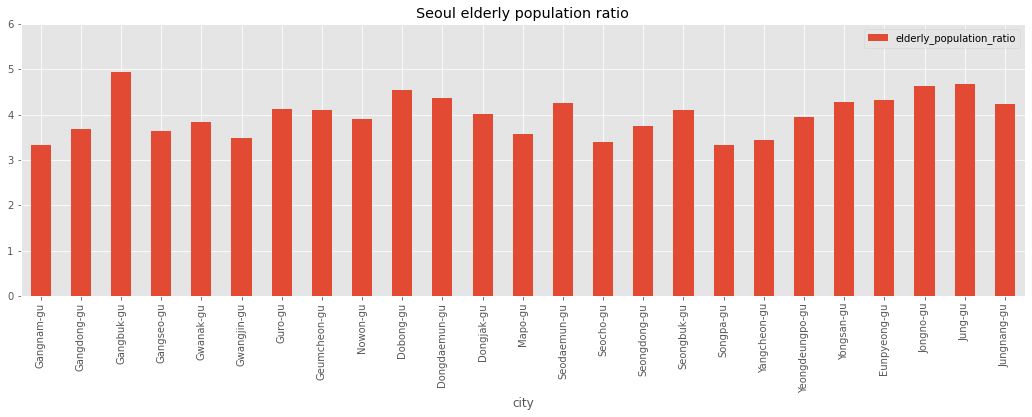

In [49]:
elderly_population_ratio.plot(kind='bar',figsize=(18,5), ylim=[0, 6], title='Seoul elderly population ratio')

### 노인과 확진자 비율 그래프로 비교하기

In [50]:
temp = pd.merge(elderly_population_ratio, patientInfo_seoul, left_index=True, right_index=True)
temp

elderly_population_ratio  confirmed  confirmed_ratio
city                                                                 
Gangnam-gu                           3.34         83             6.79
Gangdong-gu                          3.69         34             2.78
Gangbuk-gu                           4.95         24             1.96
Gangseo-gu                           3.65         77             6.30
Gwanak-gu                            3.84        112             9.17
Gwangjin-gu                          3.49         17             1.39
Guro-gu                              4.12         85             6.96
Geumcheon-gu                         4.10         31             2.54
Nowon-gu                             3.91         43             3.52
Dobong-gu                            4.54         62             5.07
Dongdaemun-gu                        4.38         38             3.11
Dongjak-gu                           4.02         53             4.34
Mapo-gu                              3.57         38             3.11
Seodaemun-gu                         4.26         34             2.78
Seocho-gu                            3.40         55             4.50
Seongdong-gu                         3.75         49             4.01
Seongbuk-gu                          4.10         33             2.70
Songpa-gu                            3.33         55             4.50
Yangcheon-gu                         3.44         71             5.81
Yeongdeungpo-gu                      3.96         62             5.07
Yongsan-gu                           4.28         50             4.09
Eunpyeong-gu                         4.32         53             4.34
Jongno-gu                            4.64         19             1.55
Jung-gu                              4.68         12             0.98
Jungnang-gu                          4.23         32             2.62

<Figure size 720x720 with 0 Axes>

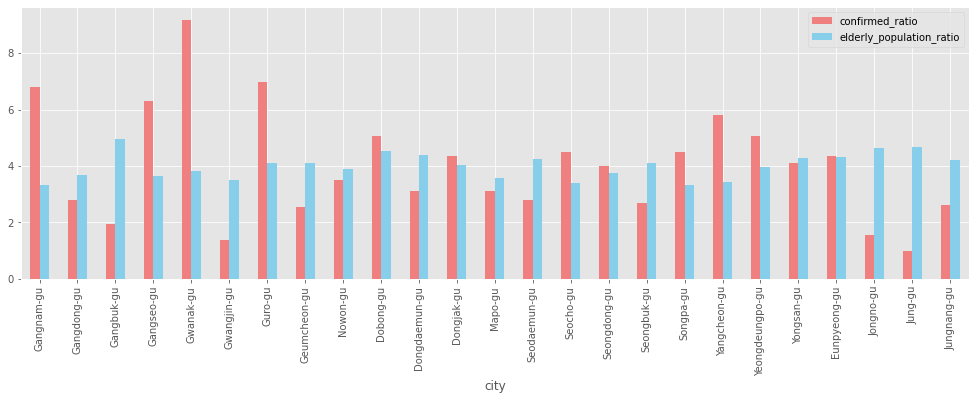

In [51]:
fig = plt.figure(figsize=(10,10))
temp.loc[:,['confirmed_ratio', 'elderly_population_ratio']].plot(kind='bar', figsize=(17,5), color = ["lightcoral", "skyblue"]) 
plt.show()

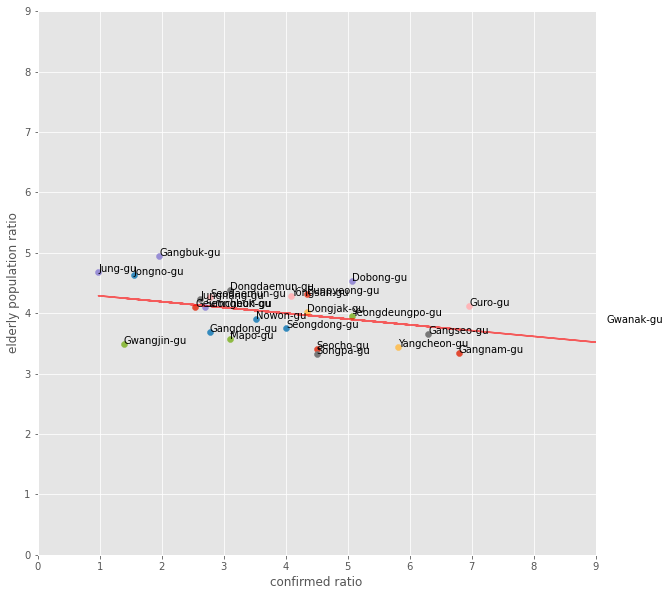

In [52]:
x_list = []
y_list = []

plt.figure(figsize=(10,10))
for city in list(temp.index):
    x = temp.loc[city]['confirmed_ratio']
    x_list.append(x)
    y = temp.loc[city]['elderly_population_ratio']
    y_list.append(y)
    plt.scatter(x, y)
    plt.text(x, y, city)

b = make_b(x_list, y_list)
a = make_a(x_list, y_list)
reg_y = []
for i in x_list:
    reg_y.append(a + (b * i))
    
# plt.plot(x_list, y_list, 'r')
plt.plot(x_list, reg_y, c = 'r', alpha = 0.6)
plt.xlim([0, 9])
plt.ylim([0, 9])
plt.xlabel('confirmed ratio')
plt.ylabel('elderly population ratio')
plt.title('')
plt.show()

- 노인과 확진자는 관련이 없어보인다.

### 노인과 확진자 상관분석

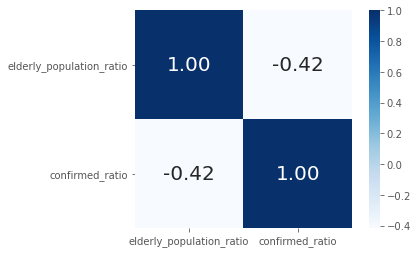

In [54]:
import seaborn as sns

corr = temp[['elderly_population_ratio', 'confirmed_ratio']].corr(method = 'pearson')
corr

heatmap = sns.heatmap(corr, 
                      cbar = True, 
                      annot = True, 
                      annot_kws={'size' : 20}, 
                      fmt = '.2f', 
                      square = True, 
                      cmap = 'Blues')

**노인과 확진자는 뚜렷한 음적 선형관계이다.**

## 3) 독거노인이 많은 자치구가 확진자도 많을까?

### 자치구별 독거노인 비율 데이터

In [55]:
elderly_alone_ratio = seoul_region[['city', 'elderly_alone_ratio']]

elderly_alone_ratio    # 자치구별 독거 노인 비율 데이터

city  elderly_alone_ratio
0             Seoul                  5.8
1        Gangnam-gu                  4.3
2       Gangdong-gu                  5.4
3        Gangbuk-gu                  8.5
4        Gangseo-gu                  5.7
5         Gwanak-gu                  4.9
6       Gwangjin-gu                  4.8
7           Guro-gu                  5.7
8      Geumcheon-gu                  6.7
9          Nowon-gu                  7.4
10        Dobong-gu                  7.2
11    Dongdaemun-gu                  6.7
12       Dongjak-gu                  5.2
13          Mapo-gu                  4.9
14     Seodaemun-gu                  6.2
15        Seocho-gu                  3.8
16     Seongdong-gu                  5.3
17      Seongbuk-gu                  6.0
18        Songpa-gu                  4.1
19     Yangcheon-gu                  5.5
20  Yeongdeungpo-gu                  5.8
21       Yongsan-gu                  6.5
22     Eunpyeong-gu                  6.5
23        Jongno-gu                  6.8
24          Jung-gu                  7.4
25      Jungnang-gu                  6.9

In [56]:
elderly_alone_ratio = elderly_alone_ratio[1:]
elderly_alone_ratio

city  elderly_alone_ratio
1        Gangnam-gu                  4.3
2       Gangdong-gu                  5.4
3        Gangbuk-gu                  8.5
4        Gangseo-gu                  5.7
5         Gwanak-gu                  4.9
6       Gwangjin-gu                  4.8
7           Guro-gu                  5.7
8      Geumcheon-gu                  6.7
9          Nowon-gu                  7.4
10        Dobong-gu                  7.2
11    Dongdaemun-gu                  6.7
12       Dongjak-gu                  5.2
13          Mapo-gu                  4.9
14     Seodaemun-gu                  6.2
15        Seocho-gu                  3.8
16     Seongdong-gu                  5.3
17      Seongbuk-gu                  6.0
18        Songpa-gu                  4.1
19     Yangcheon-gu                  5.5
20  Yeongdeungpo-gu                  5.8
21       Yongsan-gu                  6.5
22     Eunpyeong-gu                  6.5
23        Jongno-gu                  6.8
24          Jung-gu                  7.4
25      Jungnang-gu                  6.9

In [57]:
elderly_alone_ratio['elderly_alone_ratio'].sum()

148.20000000000002

In [58]:
elderly_alone_ratio['elderly_alone_ratio'] = round(elderly_alone_ratio['elderly_alone_ratio'].div(elderly_alone_ratio['elderly_alone_ratio'].sum())*100, 2)
elderly_alone_ratio['elderly_alone_ratio'].sum()

/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


100.02

In [59]:
elderly_alone_ratio.set_index('city', inplace=True)

elderly_alone_ratio

elderly_alone_ratio
city                                
Gangnam-gu                      2.90
Gangdong-gu                     3.64
Gangbuk-gu                      5.74
Gangseo-gu                      3.85
Gwanak-gu                       3.31
Gwangjin-gu                     3.24
Guro-gu                         3.85
Geumcheon-gu                    4.52
Nowon-gu                        4.99
Dobong-gu                       4.86
Dongdaemun-gu                   4.52
Dongjak-gu                      3.51
Mapo-gu                         3.31
Seodaemun-gu                    4.18
Seocho-gu                       2.56
Seongdong-gu                    3.58
Seongbuk-gu                     4.05
Songpa-gu                       2.77
Yangcheon-gu                    3.71
Yeongdeungpo-gu                 3.91
Yongsan-gu                      4.39
Eunpyeong-gu                    4.39
Jongno-gu                       4.59
Jung-gu                         4.99
Jungnang-gu                     4.66

In [60]:
elderly_alone_ratio

elderly_alone_ratio
city                                
Gangnam-gu                      2.90
Gangdong-gu                     3.64
Gangbuk-gu                      5.74
Gangseo-gu                      3.85
Gwanak-gu                       3.31
Gwangjin-gu                     3.24
Guro-gu                         3.85
Geumcheon-gu                    4.52
Nowon-gu                        4.99
Dobong-gu                       4.86
Dongdaemun-gu                   4.52
Dongjak-gu                      3.51
Mapo-gu                         3.31
Seodaemun-gu                    4.18
Seocho-gu                       2.56
Seongdong-gu                    3.58
Seongbuk-gu                     4.05
Songpa-gu                       2.77
Yangcheon-gu                    3.71
Yeongdeungpo-gu                 3.91
Yongsan-gu                      4.39
Eunpyeong-gu                    4.39
Jongno-gu                       4.59
Jung-gu                         4.99
Jungnang-gu                     4.66

<AxesSubplot:title={'center':'Seoul elderly alone ratio'}, xlabel='city'>

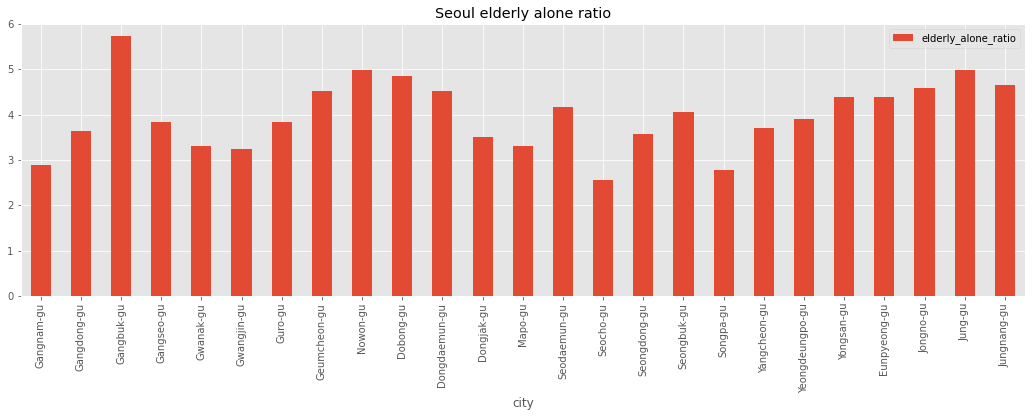

In [62]:
elderly_alone_ratio.plot(kind='bar',figsize=(18,5), ylim=[0, 6], title='Seoul elderly alone ratio')

### 독거노인과 확진자 비율 그래프로 비교하기

In [63]:
temp = pd.merge(elderly_alone_ratio, patientInfo_seoul, left_index=True, right_index=True)
temp

elderly_alone_ratio  confirmed  confirmed_ratio
city                                                            
Gangnam-gu                      2.90         83             6.79
Gangdong-gu                     3.64         34             2.78
Gangbuk-gu                      5.74         24             1.96
Gangseo-gu                      3.85         77             6.30
Gwanak-gu                       3.31        112             9.17
Gwangjin-gu                     3.24         17             1.39
Guro-gu                         3.85         85             6.96
Geumcheon-gu                    4.52         31             2.54
Nowon-gu                        4.99         43             3.52
Dobong-gu                       4.86         62             5.07
Dongdaemun-gu                   4.52         38             3.11
Dongjak-gu                      3.51         53             4.34
Mapo-gu                         3.31         38             3.11
Seodaemun-gu                    4.18         34             2.78
Seocho-gu                       2.56         55             4.50
Seongdong-gu                    3.58         49             4.01
Seongbuk-gu                     4.05         33             2.70
Songpa-gu                       2.77         55             4.50
Yangcheon-gu                    3.71         71             5.81
Yeongdeungpo-gu                 3.91         62             5.07
Yongsan-gu                      4.39         50             4.09
Eunpyeong-gu                    4.39         53             4.34
Jongno-gu                       4.59         19             1.55
Jung-gu                         4.99         12             0.98
Jungnang-gu                     4.66         32             2.62

<Figure size 720x720 with 0 Axes>

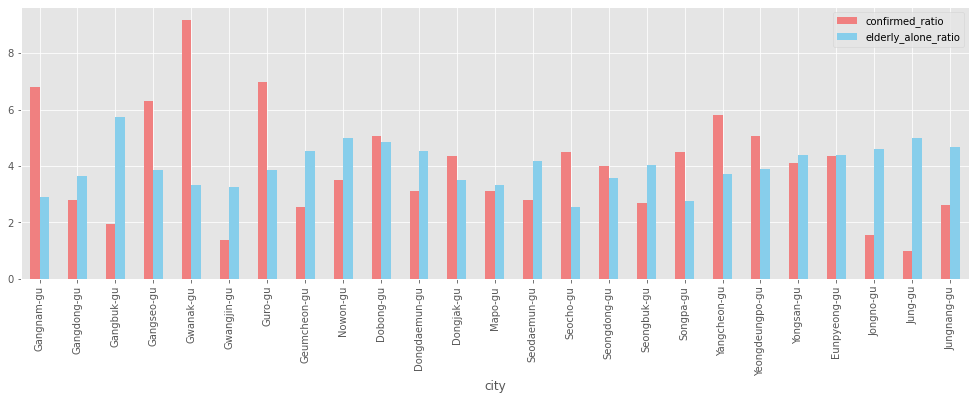

In [64]:
fig = plt.figure(figsize=(10,10))
temp.loc[:,['confirmed_ratio', 'elderly_alone_ratio']].plot(kind='bar', figsize=(17,5), color = ["lightcoral", "skyblue"]) 
plt.show()

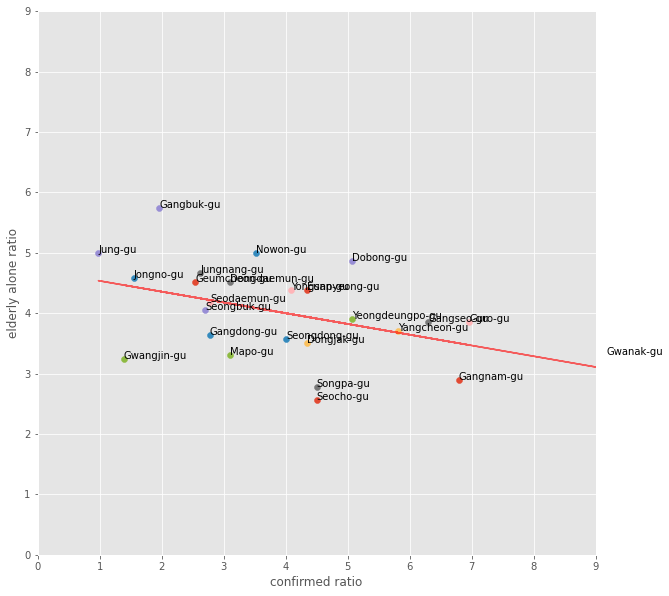

In [66]:
x_list = []
y_list = []

plt.figure(figsize=(10,10))
for city in list(temp.index):
    x = temp.loc[city]['confirmed_ratio']
    x_list.append(x)
    y = temp.loc[city]['elderly_alone_ratio']
    y_list.append(y)
    plt.scatter(x, y)
    plt.text(x, y, city)

b = make_b(x_list, y_list)
a = make_a(x_list, y_list)
reg_y = []
for i in x_list:
    reg_y.append(a + (b * i))
    
# plt.plot(x_list, y_list, 'r')
plt.plot(x_list, reg_y, c = 'r', alpha = 0.6)
plt.xlim([0, 9])
plt.ylim([0, 9])
plt.xlabel('confirmed ratio')
plt.ylabel('elderly alone ratio')
plt.title('')
plt.show()

독거노인과 확진자 비율은 관련이 있어보인다.

### 독거노인과 확진자 상관분석

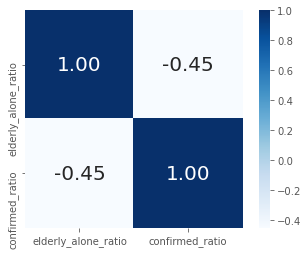

In [67]:
import seaborn as sns

corr = temp[['elderly_alone_ratio', 'confirmed_ratio']].corr(method = 'pearson')
corr

heatmap = sns.heatmap(corr, 
                      cbar = True, 
                      annot = True, 
                      annot_kws={'size' : 20}, 
                      fmt = '.2f', 
                      square = True, 
                      cmap = 'Blues')

**독거노인과 확진자는 뚜렷한 음적 선형관계이다.**

## 4) 학원이 많은 자치구가 확진자도 많을까?

### 자치구별 학원 비율 데이터

In [68]:
academy_ratio = seoul_region[['city', 'academy_ratio']]

academy_ratio    # 자치구별 학원 비율 데이터

city  academy_ratio
0             Seoul           1.44
1        Gangnam-gu           4.18
2       Gangdong-gu           1.54
3        Gangbuk-gu           0.67
4        Gangseo-gu           1.17
5         Gwanak-gu           0.89
6       Gwangjin-gu           1.16
7           Guro-gu           1.00
8      Geumcheon-gu           0.96
9          Nowon-gu           1.39
10        Dobong-gu           0.95
11    Dongdaemun-gu           1.06
12       Dongjak-gu           1.17
13          Mapo-gu           1.83
14     Seodaemun-gu           1.12
15        Seocho-gu           2.60
16     Seongdong-gu           0.97
17      Seongbuk-gu           1.02
18        Songpa-gu           1.65
19     Yangcheon-gu           2.26
20  Yeongdeungpo-gu           1.21
21       Yongsan-gu           0.68
22     Eunpyeong-gu           1.09
23        Jongno-gu           1.71
24          Jung-gu           0.94
25      Jungnang-gu           0.70

In [69]:
academy_ratio = academy_ratio[1:]
academy_ratio

city  academy_ratio
1        Gangnam-gu           4.18
2       Gangdong-gu           1.54
3        Gangbuk-gu           0.67
4        Gangseo-gu           1.17
5         Gwanak-gu           0.89
6       Gwangjin-gu           1.16
7           Guro-gu           1.00
8      Geumcheon-gu           0.96
9          Nowon-gu           1.39
10        Dobong-gu           0.95
11    Dongdaemun-gu           1.06
12       Dongjak-gu           1.17
13          Mapo-gu           1.83
14     Seodaemun-gu           1.12
15        Seocho-gu           2.60
16     Seongdong-gu           0.97
17      Seongbuk-gu           1.02
18        Songpa-gu           1.65
19     Yangcheon-gu           2.26
20  Yeongdeungpo-gu           1.21
21       Yongsan-gu           0.68
22     Eunpyeong-gu           1.09
23        Jongno-gu           1.71
24          Jung-gu           0.94
25      Jungnang-gu           0.70

In [70]:
academy_ratio['academy_ratio'].sum()

33.92

In [71]:
academy_ratio['academy_ratio'] = round(academy_ratio['academy_ratio'].div(academy_ratio['academy_ratio'].sum())*100, 2)
academy_ratio['academy_ratio'].sum()

/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


99.99

In [72]:
academy_ratio.set_index('city', inplace=True)

academy_ratio

academy_ratio
city                          
Gangnam-gu               12.32
Gangdong-gu               4.54
Gangbuk-gu                1.98
Gangseo-gu                3.45
Gwanak-gu                 2.62
Gwangjin-gu               3.42
Guro-gu                   2.95
Geumcheon-gu              2.83
Nowon-gu                  4.10
Dobong-gu                 2.80
Dongdaemun-gu             3.12
Dongjak-gu                3.45
Mapo-gu                   5.40
Seodaemun-gu              3.30
Seocho-gu                 7.67
Seongdong-gu              2.86
Seongbuk-gu               3.01
Songpa-gu                 4.86
Yangcheon-gu              6.66
Yeongdeungpo-gu           3.57
Yongsan-gu                2.00
Eunpyeong-gu              3.21
Jongno-gu                 5.04
Jung-gu                   2.77
Jungnang-gu               2.06

<AxesSubplot:title={'center':'Seoul academy ratio'}, xlabel='city', ylabel='academy_ratio'>

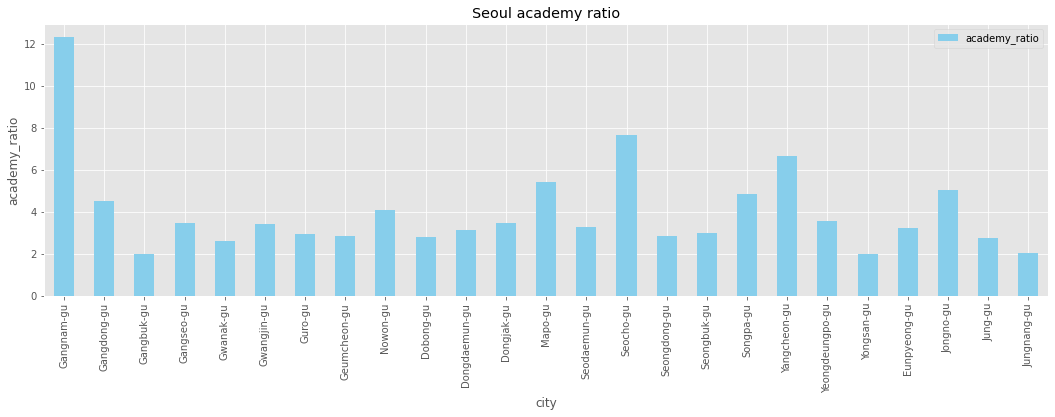

In [74]:
academy_ratio.plot(kind='bar',figsize=(18,5), ylabel='academy_ratio', color='skyblue', title='Seoul academy ratio')

### 학원과 확진자 비율 그래프로 비교하기

In [75]:
temp = pd.merge(academy_ratio, patientInfo_seoul, left_index=True, right_index=True)
temp

academy_ratio  confirmed  confirmed_ratio
city                                                      
Gangnam-gu               12.32         83             6.79
Gangdong-gu               4.54         34             2.78
Gangbuk-gu                1.98         24             1.96
Gangseo-gu                3.45         77             6.30
Gwanak-gu                 2.62        112             9.17
Gwangjin-gu               3.42         17             1.39
Guro-gu                   2.95         85             6.96
Geumcheon-gu              2.83         31             2.54
Nowon-gu                  4.10         43             3.52
Dobong-gu                 2.80         62             5.07
Dongdaemun-gu             3.12         38             3.11
Dongjak-gu                3.45         53             4.34
Mapo-gu                   5.40         38             3.11
Seodaemun-gu              3.30         34             2.78
Seocho-gu                 7.67         55             4.50
Seongdong-gu              2.86         49             4.01
Seongbuk-gu               3.01         33             2.70
Songpa-gu                 4.86         55             4.50
Yangcheon-gu              6.66         71             5.81
Yeongdeungpo-gu           3.57         62             5.07
Yongsan-gu                2.00         50             4.09
Eunpyeong-gu              3.21         53             4.34
Jongno-gu                 5.04         19             1.55
Jung-gu                   2.77         12             0.98
Jungnang-gu               2.06         32             2.62

<Figure size 720x720 with 0 Axes>

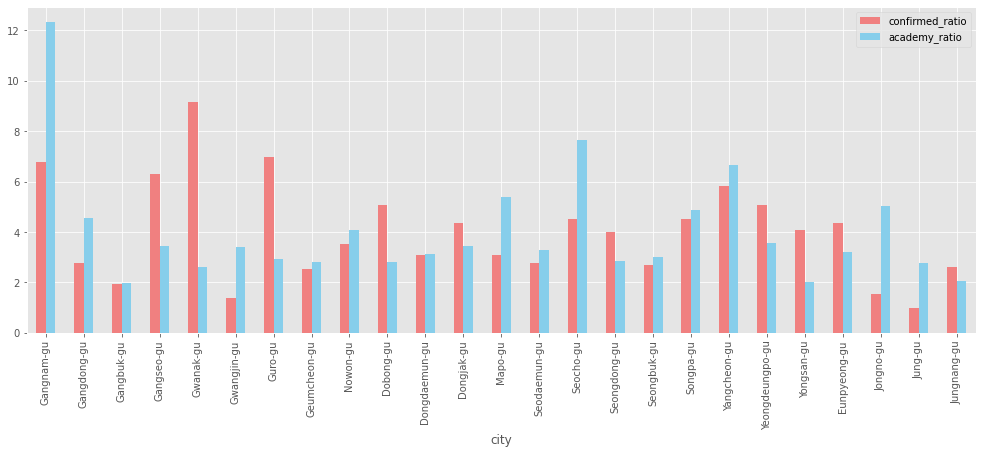

In [76]:
fig = plt.figure(figsize=(10,10))
temp.loc[:,['confirmed_ratio', 'academy_ratio']].plot(kind='bar', figsize=(17,6), color = ["lightcoral", "skyblue"]) 
plt.show()

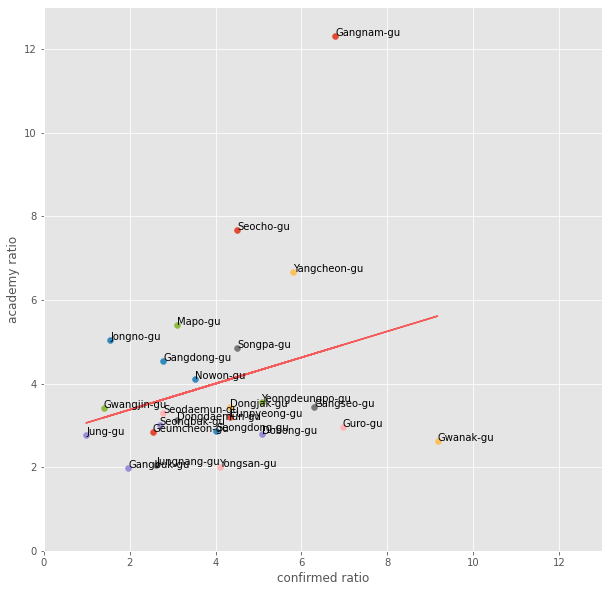

In [77]:
x_list = []
y_list = []

plt.figure(figsize=(10,10))
for city in list(temp.index):
    x = temp.loc[city]['confirmed_ratio']
    x_list.append(x)
    y = temp.loc[city]['academy_ratio']
    y_list.append(y)
    plt.scatter(x, y)
    plt.text(x, y, city)

b = make_b(x_list, y_list)
a = make_a(x_list, y_list)
reg_y = []
for i in x_list:
    reg_y.append(a + (b * i))
    
# plt.plot(x_list, y_list, 'r')
plt.plot(x_list, reg_y, c = 'r', alpha = 0.6)
plt.xlim([0, 13])
plt.ylim([0, 13])
plt.xlabel('confirmed ratio')
plt.ylabel('academy ratio')
plt.title('')
plt.show()

- 학원과 확진자는 관련이 있어보인다.

### 학원과 확진자 상관분석

In [78]:
import seaborn as sns

corr = temp[['academy_ratio', 'confirmed_ratio']].corr(method = 'pearson')
corr

heatmap = sns.heatmap(corr, 
                      cbar = True, 
                      annot = True, 
                      annot_kws={'size' : 20}, 
                      fmt = '.2f', 
                      square = True, 
                      cmap = 'Blues')

**학원과 확진자는 약한 양적 선형관계이다.**